In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import math
from qiskit import qasm3
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_qsphere
from qiskit import transpile
from qiskit.visualization import plot_state_city, plot_histogram
from pylatexenc import *
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import *
from qiskit.circuit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import math
from qiskit import qasm3
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit import transpile
from qiskit.providers.basic_provider import BasicProvider

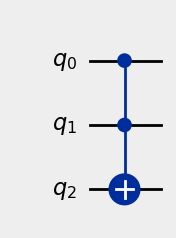

In [2]:
# AND
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

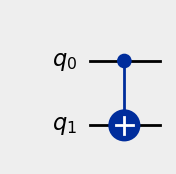

In [3]:
# XOR
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

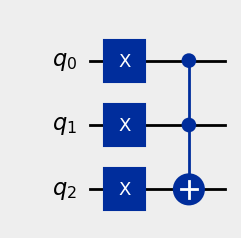

In [4]:
# OR
qc = QuantumCircuit(3)
qc.x([0,1,2])
qc.ccx(0,1,2)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

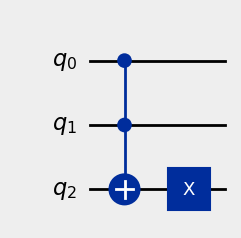

In [5]:
# NAND
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.x(2)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

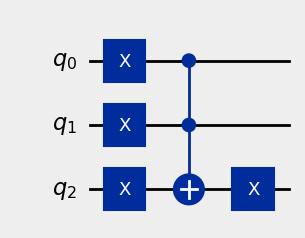

In [6]:
# NOR
qc = QuantumCircuit(3)
qc.x([0,1,2])
qc.ccx(0,1,2)
qc.x(2)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

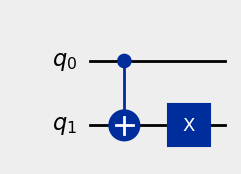

In [7]:
# XNOR
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.x(1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

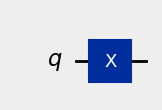

In [8]:
# NOT
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

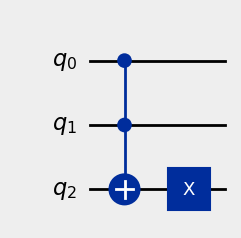

In [9]:
# NAND
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.x(2)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

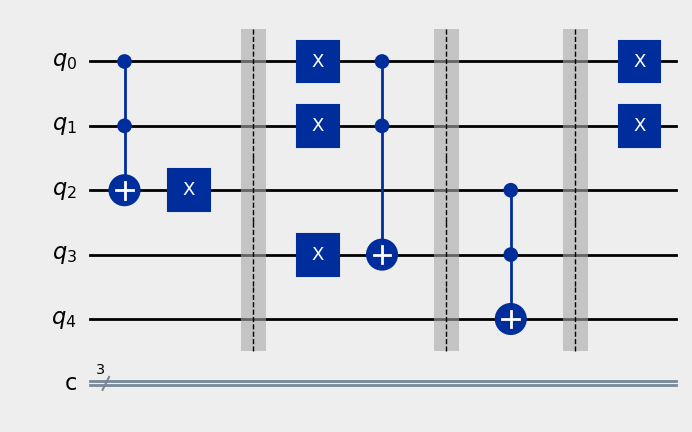

In [10]:
# XOR com entradas inalteradas
qc = QuantumCircuit(5,3)
qc.ccx(0,1,2) # NAND1
qc.x(2)
qc.barrier([0,1,2,3,4])

qc.x([0,1,3]) # OR2
qc.ccx(0,1,3)
qc.barrier([0,1,2,3,4])
     
qc.ccx(2,3,4)  # AND3
qc.barrier([0,1,2,3,4])

qc.x([0,1]) # restaura A e B

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [11]:
from qiskit.providers.basic_provider import BasicProvider
qc.measure([0,1,4],[0,1,2])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=100).result()
counts = result.get_counts()
print(counts)

{'000': 100}


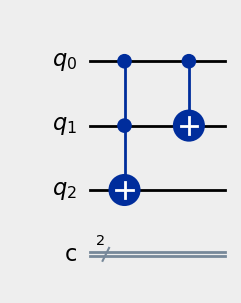

In [12]:
# Meio somador
qc = QuantumCircuit(3,2)
qc.ccx(0,1,2)  # AND transbordo
qc.cx(0,1) # XOR SOMA

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [13]:
from qiskit.providers.basic_provider import BasicProvider
qc.measure([1,2],[0,1])
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=100).result()
counts = result.get_counts()
print(counts)

{'00': 100}


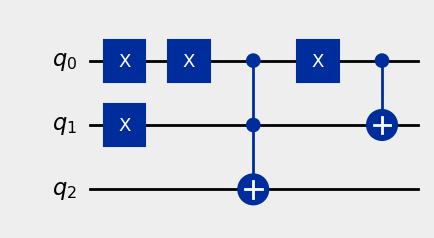

In [14]:
# Meio Subtrator 
qc = QuantumCircuit(3)

qc.x([0,1])
# q0 é A, q1 é B e q2 é cin
qc.x(0) # NOT A
qc.ccx(0,1,2) # Carry (NOT A AND B)
qc.x(0) # NOT A (volta ao valor normal)
qc.cx(0,1) # (XOR A, B) Soma sai em B


qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [15]:
from qiskit.providers.basic_provider import BasicProvider
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=100).result()
counts = result.get_counts()
print(counts)

{'001': 100}


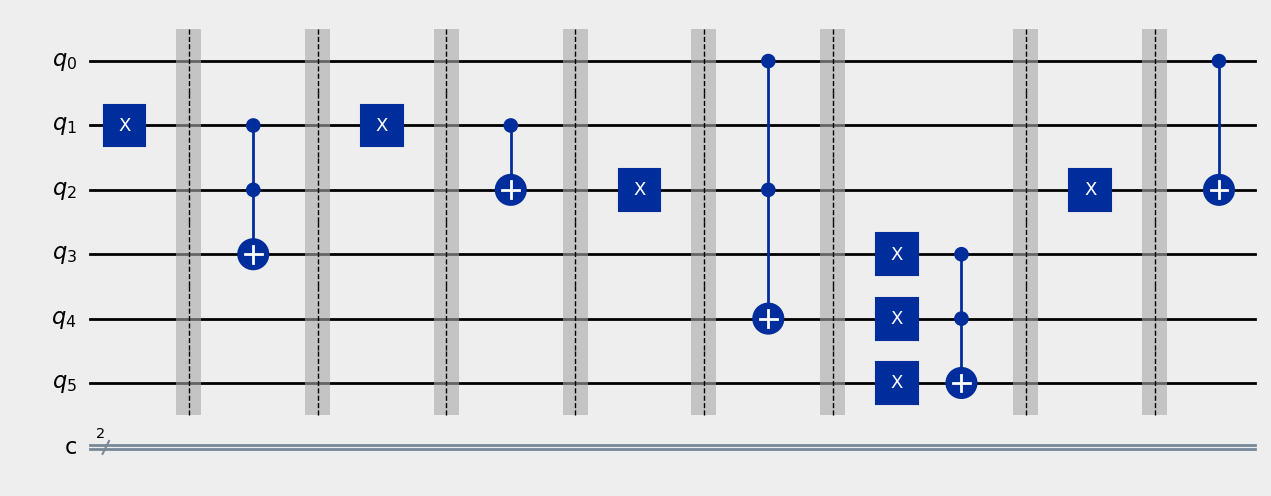

In [16]:
# Subtrator completo
qc = QuantumCircuit(6,2)
qc.x(1) # NOT1
qc.barrier([0,1,2,3,4,5])
qc.ccx(1,2,3) # ANDI 
qc.barrier ([0,1,2,3,4,5])
qc.x(1) # NOT1
qc.barrier([0,1,2,3,4,5])
qc.cx(1,2) # XOR1
qc.barrier( [0,1,2,3,4,5])
qc.x(2) #NOT2
qc.barrier( [0,1,2,3,4,5])
qc.ccx(0,2,4) # AND2
qc.barrier( [0,1,2,3,4,5])
qc.x([3,4,5])
qc.ccx(3,4,5)
qc.barrier([0,1,2,3,4,5])
qc.x(2)
qc.barrier([0,1,2,3,4,5])
qc.cx(0,2) # XOR2
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

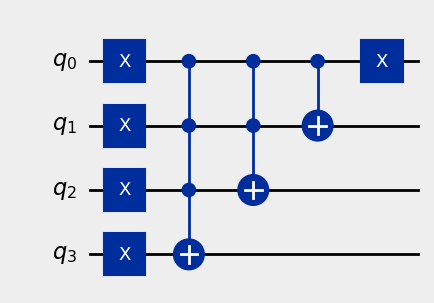

In [17]:
# tornar um número negativo com complemento de 2
qc = QuantumCircuit(4)
qc.x([0,1,2,3])
qc.mcx([0,1,2],3)
qc.ccx(0,1,2)
qc.cx(0,1)
qc.x(0)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

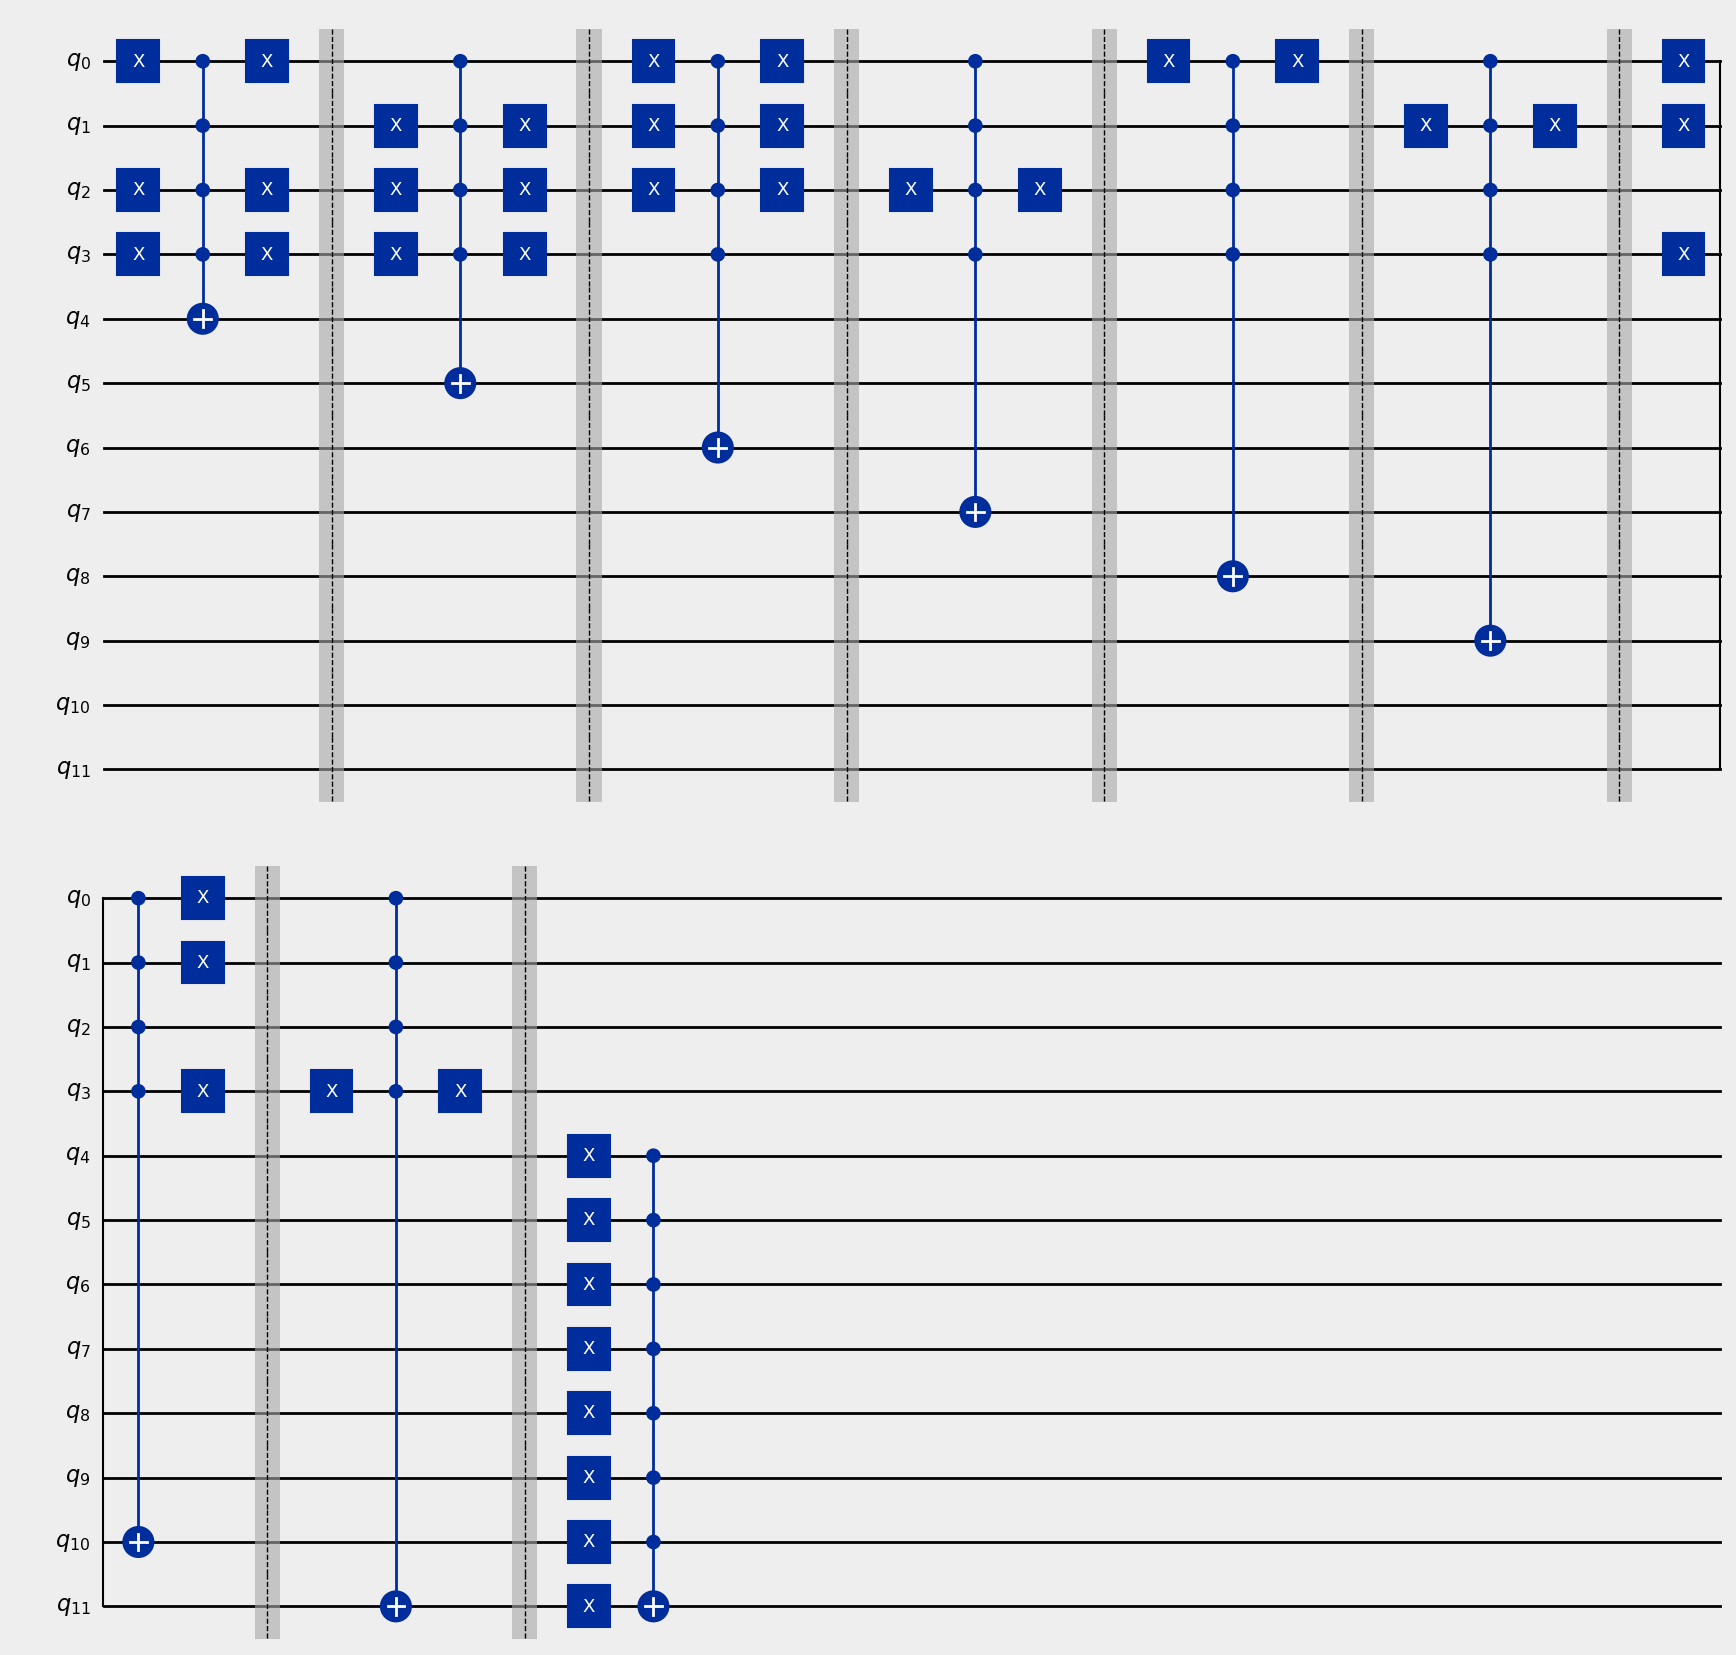

In [18]:
# paridade 
qc = QuantumCircuit(12)
#NOT A * B * NOT C * NOT D
qc.x([0,2,3])
qc.mcx([0,1,2,3],4)
qc.x([0,2,3])
qc.barrier(0,1,2,3,4,5,6,7,8,9,10,11)
# A * NOT B * NOT C *  D
qc.x([1,2,3])
qc.mcx([0,1,2,3],5)
qc.x([1,2,3])
qc.barrier(0,1,2,3,4,5,6,7,8,9,10,11)
# NOT A * NOT B * NOT C * NOT D
qc.x([0,1,2])
qc.mcx([0,1,2,3],6)
qc.x([0,1,2])
qc.barrier(0,1,2,3,4,5,6,7,8,9,10,11)
#  A *  B * NOT C *  D
qc.x([2])
qc.mcx([0,1,2,3],7)
qc.x([2])
qc.barrier(0,1,2,3,4,5,6,7,8,9,10,11)
#  NOT A *  B *  C *  D
qc.x([0])
qc.mcx([0,1,2,3],8)
qc.x([0])
qc.barrier(0,1,2,3,4,5,6,7,8,9,10,11)
#   A *  NOT B *  C *  D
qc.x([1])
qc.mcx([0,1,2,3],9)
qc.x([1])
qc.barrier(0,1,2,3,4,5,6,7,8,9,10,11)
#   NOT A *  NOT B *  C *  NOT D
qc.x([0,1,3])
qc.mcx([0,1,2,3],10)
qc.x([0,1,3])
qc.barrier(0,1,2,3,4,5,6,7,8,9,10,11)
#   NOT A *  NOT B *  C *  NOT D
qc.x([3])
qc.mcx([0,1,2,3],11)
qc.x([3])
qc.barrier(0,1,2,3,4,5,6,7,8,9,10,11)
# OR all ancillas
qc.x([4,5,6,7,8,9,10,11])
qc.mcx([4,5,6,7,8,9,10],11)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

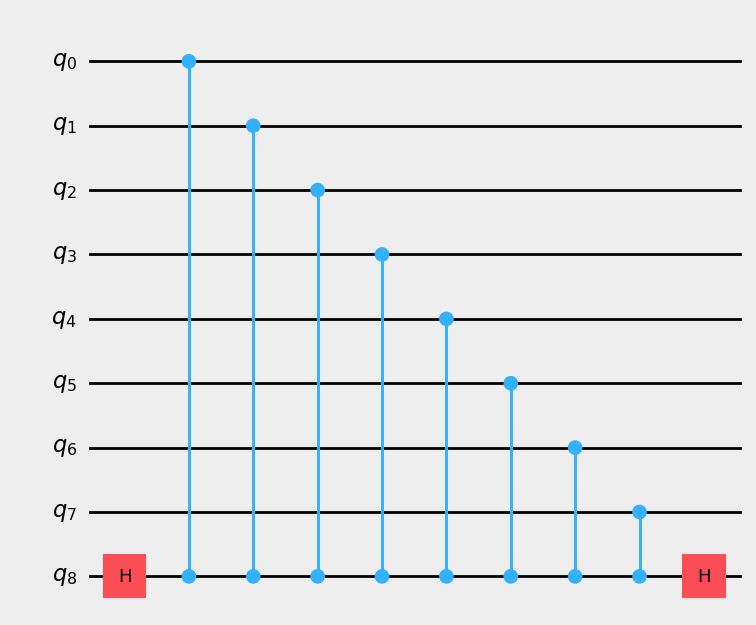

In [19]:
# Paridade utilizando superposição
qc = QuantumCircuit(9)

qc.h(8)     # baixar a vela do veleiro
qc.cz(0,8)  # enviar comandos para mdificar
qc.cz(1,8)  # o rumo do veleiro
qc.cz(2,8)
qc.cz(3,8)
qc.cz(4,8)
qc.cz(5,8)
qc.cz(6,8)
qc.cz(7,8)
qc.h(8)      # levantar a vela do veleiro
# e obter os resultados que desejamos
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [20]:
y = x^(x>>1)
y = y^(y>>2)
y = y^(y>>4)
y = y^(y>>8)
y = y^(y>>16)
y = y^(y>>32)
y = y^(y>>64)
y = y^(y>>128)

TypeError: unsupported operand type(s) for >>: 'module' and 'int'

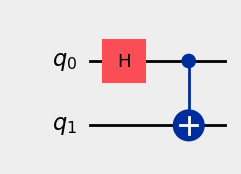

In [21]:
# QUBITS controlados 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [22]:
from qiskit.providers.basic_provider import BasicProvider
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=100).result()
counts = result.get_counts()
print(counts)

{'11': 52, '00': 48}


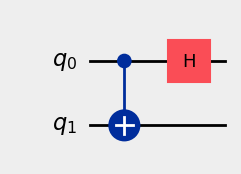

In [23]:
# QUBITS controlados 
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [24]:
from qiskit.providers.basic_provider import BasicProvider
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=100).result()
counts = result.get_counts()
print(counts)

{'01': 46, '00': 54}


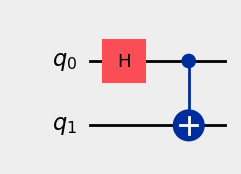

In [25]:
# Bell State 1
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

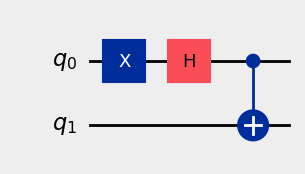

In [26]:
# Bell State 2
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

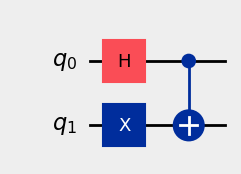

In [27]:
# Bell State 3
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

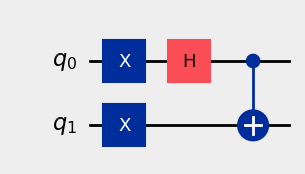

In [28]:
# Bell State 4
qc = QuantumCircuit(2)
qc.x([0,1])
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.5       +0.j        , 0.35355339+0.35355339j,
             0.46193977+0.19134172j, 0.19134172+0.46193977j],
            dims=(2, 2, 2))


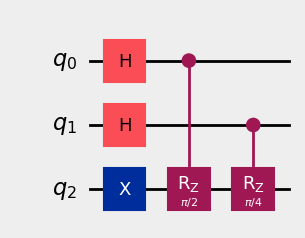

In [29]:
# Uso de outros ângulos
qc = QuantumCircuit(3)
qc.h([0,1])
qc.x(2)
qc.crz(math.pi/2, 0,2)
qc.crz(math.pi/4, 1,2)

state = Statevector(qc)
plot_bloch_multivector(state)

state = Statevector(qc)
print(state)


qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})


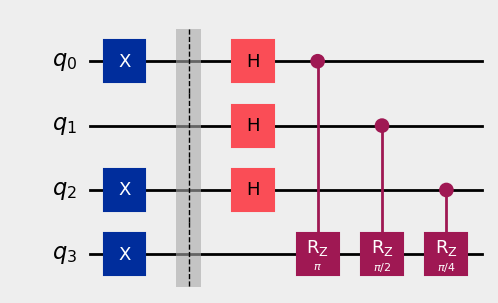

In [30]:
qc = QuantumCircuit(4)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.x(3)

# QFT
qc.barrier([0,1,2,3])
qc.h([0,1,2])
qc.crz(math.pi, 0,3)
qc.crz(math.pi/2, 1,3)
qc.crz(math.pi/4, 2,3)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'1100': 30, '1101': 34, '1011': 35, '1000': 27, '1001': 41, '1110': 37, '1010': 24, '1111': 28}


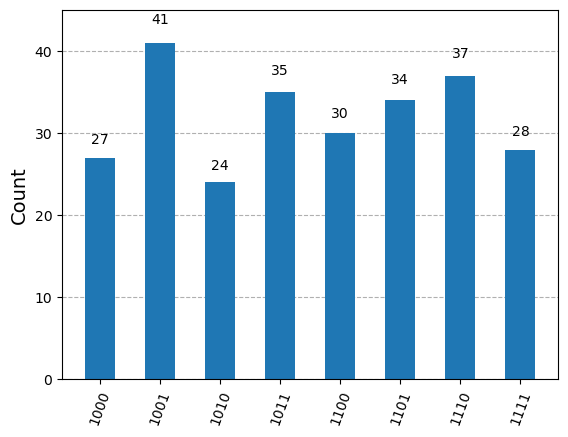

In [31]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

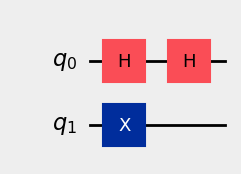

In [32]:
qc = QuantumCircuit(2)

# QFT
qc.h(0)
qc.x(1)
qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

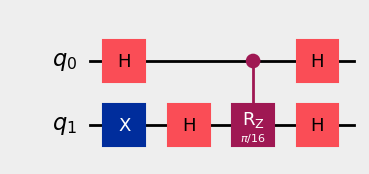

In [33]:
qc = QuantumCircuit(2)

# QFT
qc.h(0)
qc.x(1)
qc.h(1)
qc.crz(math.pi/16, 0,1)
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

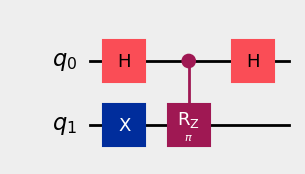

In [34]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.crz(math.pi, 0,1)
qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'11': 1060, '10': 988}


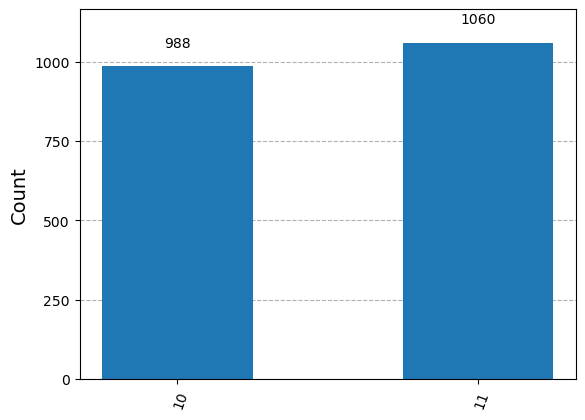

In [35]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=2048).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

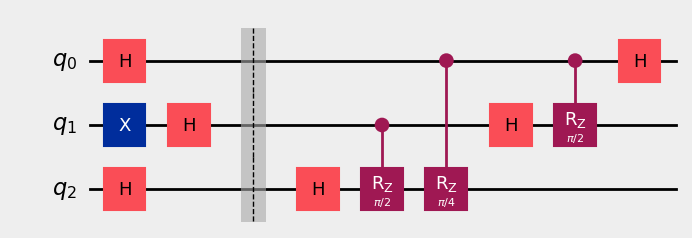

In [36]:
qc = QuantumCircuit(3)

# Encode the state 5
qc.h([0,2])
qc.x(1)
qc.h(1)

# QFT
qc.barrier([0,1,2])
qc.h(2)
qc.crz(math.pi/2, 1,2)
qc.crz(math.pi/4, 0,2)

qc.h(1)
qc.crz(math.pi/2, 0,1)

qc.h(0)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'010': 209, '000': 23, '011': 10, '001': 14}


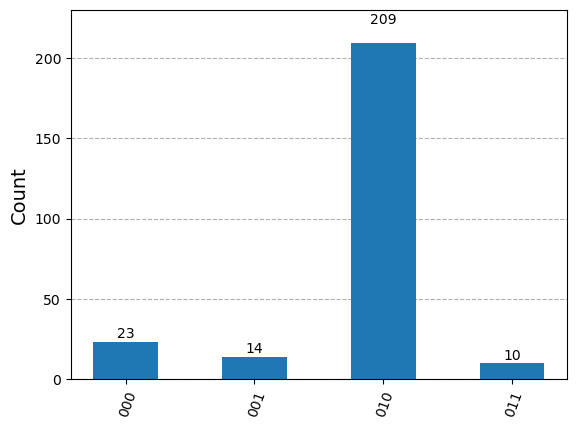

In [37]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

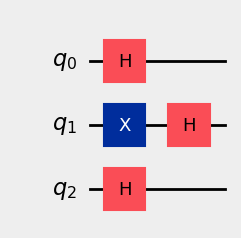

In [38]:
qc = QuantumCircuit(3)

# Encode the state 5
qc.h([0,2])
qc.x(1)
qc.h(1)

# QFT
#qc.barrier([0,1,2])
#qc.h(2)
#qc.crz(math.pi/2, 1,2)
#qc.crz(math.pi/4, 0,2)

#qc.h(1)
#qc.crz(math.pi/2, 0,1)

#qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

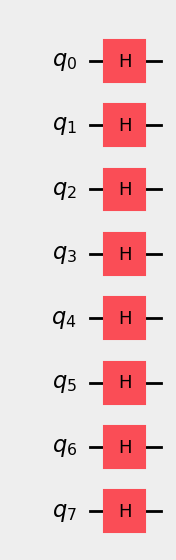

In [39]:
#gerador de números randômicos
qc = QuantumCircuit(8)

qc.h([0,1,2,3,4,5,6,7])

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'00010111': 2, '00000010': 3, '00010110': 1, '10000011': 4, '11001110': 1, '01100100': 3, '10011011': 1, '01111000': 2, '10001111': 1, '00001011': 4, '00011001': 4, '00101101': 1, '01011000': 2, '01100001': 2, '11000101': 1, '01010001': 2, '11000000': 1, '01001010': 2, '01010011': 1, '11111000': 3, '10100001': 2, '10100010': 2, '10101110': 4, '10110001': 2, '01011101': 2, '01101111': 1, '10001011': 1, '00111111': 1, '00111001': 4, '10101111': 3, '10100101': 1, '10101010': 2, '10001010': 2, '01011011': 1, '01100000': 2, '10000100': 3, '00000110': 4, '11110010': 1, '00100101': 2, '01001011': 1, '10100110': 1, '00010000': 1, '11111011': 1, '10111010': 2, '00100001': 3, '01110100': 1, '11011101': 1, '11000010': 1, '11000100': 1, '10100100': 1, '10000000': 1, '10010011': 2, '10001000': 1, '11111111': 2, '00100100': 1, '11010111': 3, '11111010': 2, '11111100': 2, '00100110': 2, '00101010': 3, '00111000': 2, '01111100': 1, '01100010': 1, '00111101': 1, '11010010': 2, '11110011': 1, '00100000

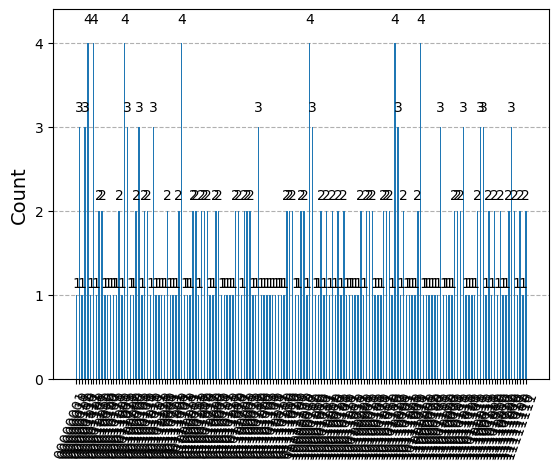

In [40]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

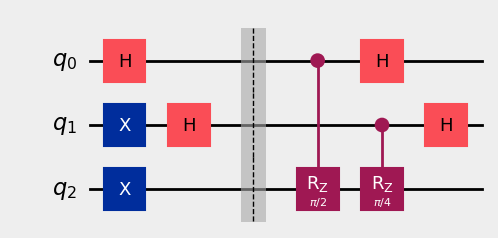

In [41]:
qc = QuantumCircuit(3)

qc.x(2)
qc.h(0)
#qc.h(2)
qc.x(1)
qc.h(1)


qc.barrier([0,1,2])
qc.crz(math.pi/2, 0,2)
qc.crz(math.pi/4, 1,2)

qc.h([0,1])

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'111': 48, '110': 200, '100': 7, '101': 1}


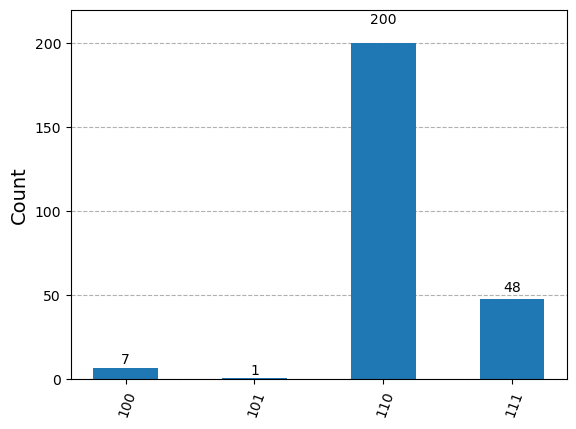

In [42]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

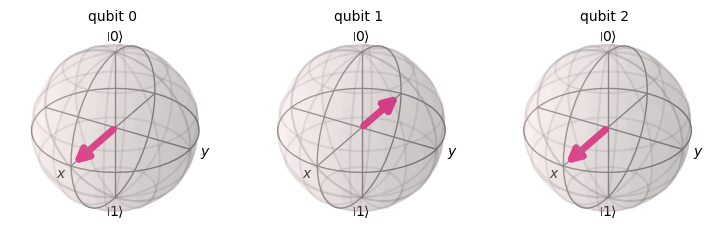

In [43]:
qc = QuantumCircuit(3)

qc.h([0,2])
qc.x(1)
qc.h(1)
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

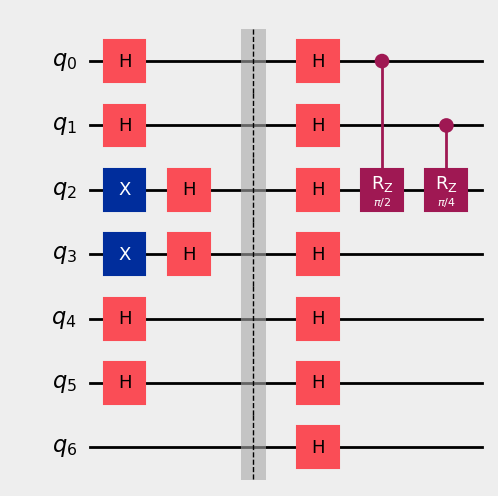

In [44]:
qc = QuantumCircuit(7)

qc.h([0,1,4,5])
qc.x([2,3])
qc.h([2,3])

qc.barrier([0,1,2,3,4,5,6])
qc.h(6)
qc.h([0,1,2,3,4,5])

qc.crz(math.pi/2, 0,2)
qc.crz(math.pi/4, 1,2)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[2.]
 [1.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.37139068]
 [-0.92847669]]


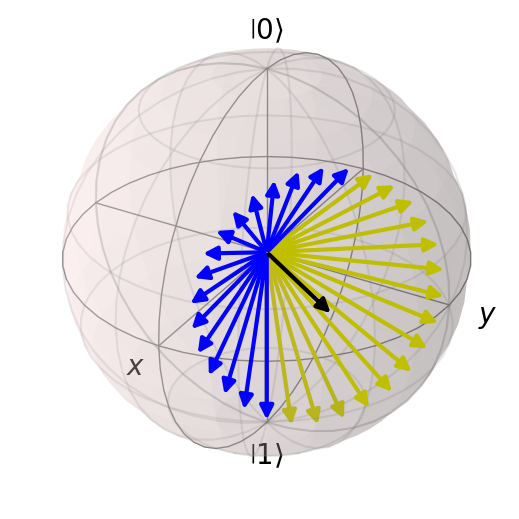

In [45]:
from qutip import *
import numpy as np
import scipy
import matplotlib.colors
import scipy
import scipy as sp
from scipy.linalg import logm, expm

def _hamming_distance(x, bits=32):
    """
    Calculate the bit-wise Hamming distance of x from 0: That is, the number
    1s in the integer x.
    """
    tot = 0
    while x:
        tot += 1
        x &= x - 1
    return tot

def hadamard_transform(N=1):
    data = 2 ** (-N / 2) * np.array([[(-1) ** _hamming_distance(i & j)
                                      for i in range(2 ** N)]
                                     for j in range(2 ** N)])
    return data

#the gate
hadamard = hadamard_transform() 

# the hamilton operator describing the evolution during the hadamard gate
hamilton = Qobj(logm(hadamard)) / np.pi * 1.j

#create initial state vector
psi0 = (basis(2, 1)).unit()

# describing the gate as time evolution
def gate(t):
    return (-2*np.pi*1.j*hamilton*t).expm()

# evolve the gate
n = 16
psi = [gate(t)*psi0 for t in np.linspace(0, 1., 2*n)]

# plotting the states. State evolution during the first hamadard gate is yellow. During second hadamard gate is blue
b = Bloch()
b.vector_color = [matplotlib.colors.to_rgba('y', alpha=i) for i in np.arange(n)/float(n)] + [matplotlib.colors.to_rgba('b', alpha=i) for i in np.arange(n)/float(n)]  + ['black']
b.add_states(psi)
var1 = basis(2,0) + (basis(2,0) + basis(2,1))
var1.unit().unit()
print(var1)
var2 = (var1 - 12*psi0/2).unit()
print(var2)
b.add_states([var2]) 
b.show()

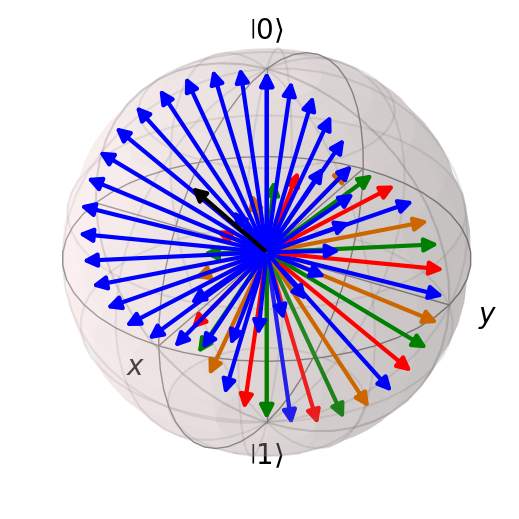

In [46]:
from qutip import *
import numpy as np
import scipy
import matplotlib.colors
import scipy
import scipy as sp
from scipy.linalg import logm, expm

hadamard = hadamard_transform() 
hamilton = Qobj(logm(hadamard)) / np.pi * 1.j
psi0 = (basis(2, 0)).unit()

def gate(t):
    return (-2*np.pi*1.j*hamilton*t).expm()

n = 16
psi = [gate(t)*psi0 for t in np.linspace(0, 1., 2*n)]

b = Bloch()
b.vector_color = ['green' for i in np.arange(n)/float(n)] + \
                 ['green' for i in np.arange(n)/float(n)]  + \
                 ['black']
b.add_states(psi)
b.add_states([(basis(2,0) + (basis(2,0) + basis(2,1)).unit()).unit()])


hadamard = hadamard_transform() 

# the hamilton operator describing the evolution during the hadamard gate
hamilton = Qobj(logm(hadamard)) / np.pi * 1.j

#create initial state vector
psi0 = (basis(2, 1)).unit()

# describing the gate as time evolution
def gate(t):
    return (-2*np.pi*1.j*hamilton*t).expm()

# evolve the gate
n = 16
psi = [gate(t)*psi0 for t in np.linspace(0, 1., 2*n)]

# plotting the states. State evolution during the first hamadard gate is yellow. During second hadamard gate is blue
b.vector_color = ['blue' for i in np.arange(n)/float(n)] + \
                 ['blue' for i in np.arange(n)/float(n)]  + \
                 ['black']
b.add_states(psi)


b.show()

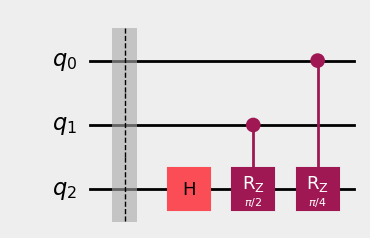

In [47]:
qc = QuantumCircuit(3)
# qc.x([0,1])
qc.barrier([0,1,2])
qc.h(2)
qc.crz(math.pi/2, 1,2)
qc.crz(math.pi/4, 0,2)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
#matrix = Statevector.from_instruction(qc)
#plot_bloch_multivector(matrix, figsize=[3,3])

{'100': 115, '000': 141}


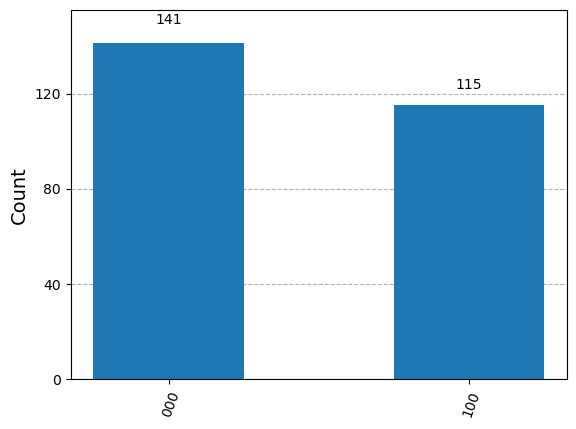

In [48]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

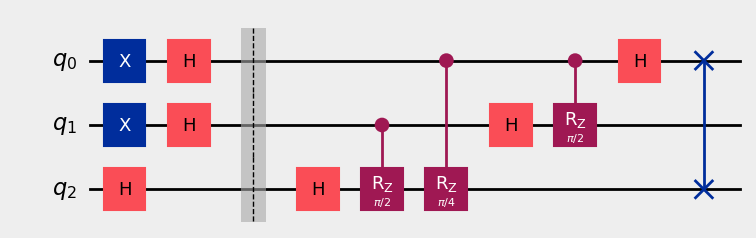

In [49]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(1)
qc.h(0)
qc.h([2])
qc.h(1)

qc.barrier([0,1,2])

qc.h(2)
qc.crz(math.pi/2, 1,2)
qc.crz(math.pi/4, 0,2)
qc.h(1)
qc.crz(math.pi/2, 0,1)
qc.h(0)
qc.swap(0,2)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})


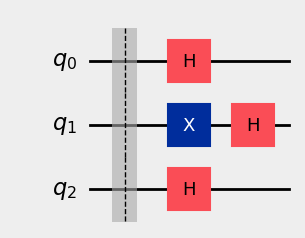

In [50]:
qc = QuantumCircuit(3)

qc.barrier([0,1,2])
qc.x(1)
qc.h([0,1,2])

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

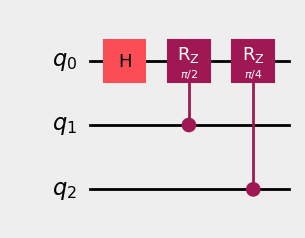

In [51]:
qc = QuantumCircuit(3)
qc.h(0)
#qc.x(1)
#qc.h(1)
qc.crz(math.pi/2, 1,0)
qc.crz(math.pi/4, 2,0)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
#matrix = Statevector.from_instruction(qc)
#plot_bloch_multivector(matrix, figsize=[3,3])

{'001': 128, '000': 128}


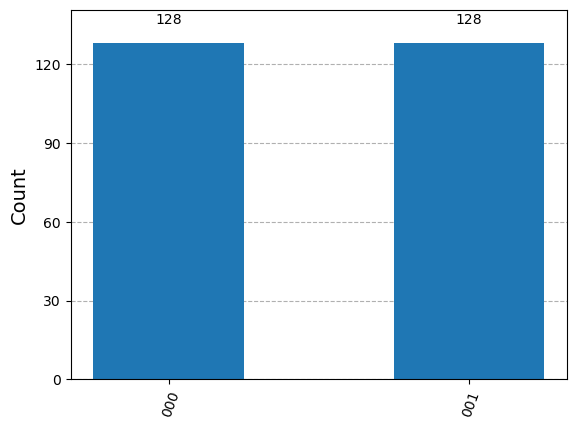

In [52]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

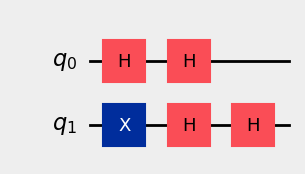

In [53]:
qc = QuantumCircuit(2)

# QFT
qc.h(0)
qc.x(1)
qc.h(1)
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'10': 256}


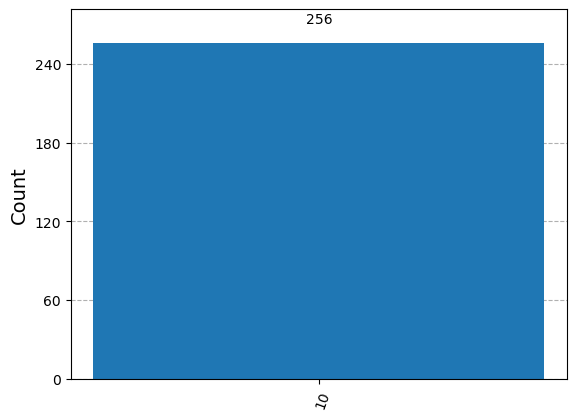

In [54]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

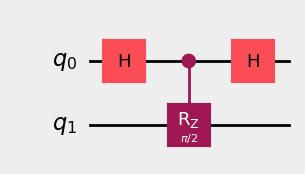

In [55]:
qc = QuantumCircuit(2)

qc.h(0)
qc.crz(math.pi/2, 0,1)
qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

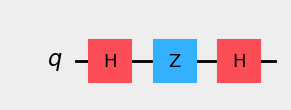

In [56]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
#matrix = Statevector.from_instruction(qc)
#plot_bloch_multivector(matrix, figsize=[3,3])

{'1': 256}


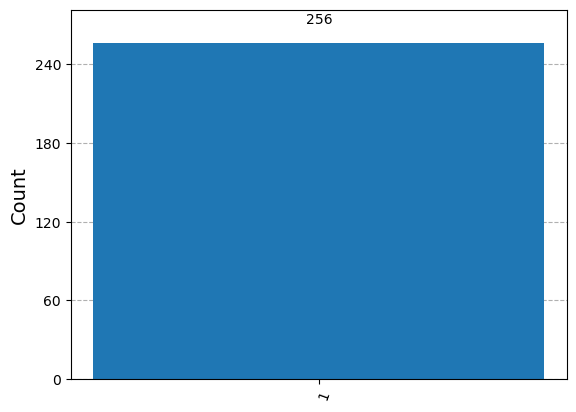

In [57]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

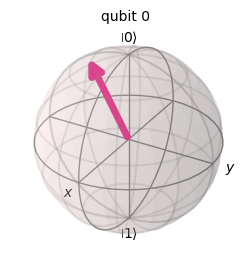

In [58]:
qc = QuantumCircuit(1)
qc.rx(math.pi / 6, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

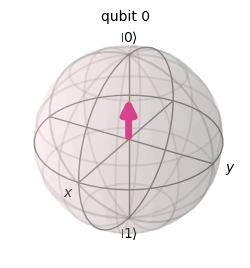

In [59]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.rz(math.pi / 6, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

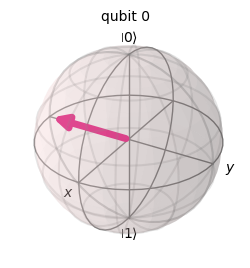

In [60]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.rz(math.pi / 2, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

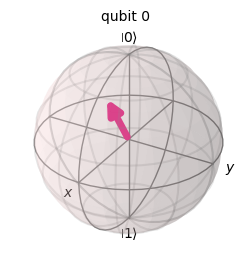

In [61]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.rz(math.pi / 4, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

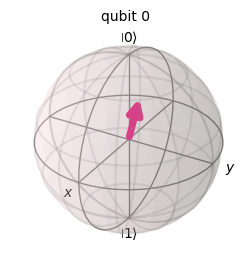

In [62]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.rz(math.pi / 8, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

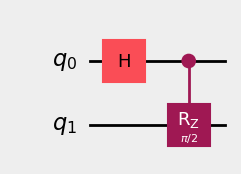

In [63]:
qc = QuantumCircuit(2)
#qc.x(0)
qc.h(0)
qc.crz(math.pi / 2, 0,1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
#matrix = Statevector.from_instruction(qc)
#plot_bloch_multivector(matrix, figsize=[3,3])

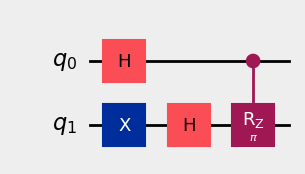

In [64]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.crz(math.pi, 0,1)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
#matrix = Statevector.from_instruction(qc)
#plot_bloch_multivector(matrix, figsize=[3,3])

{'11': 58, '00': 61, '10': 70, '01': 67}


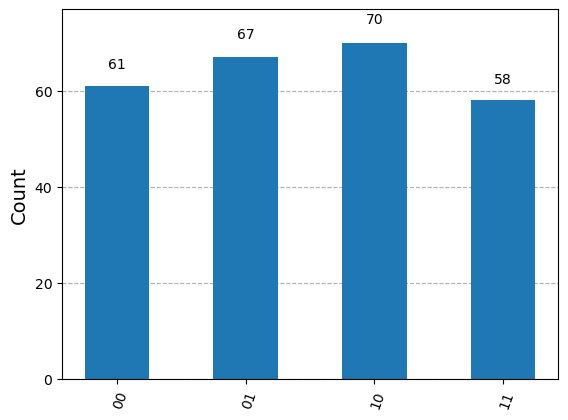

In [65]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

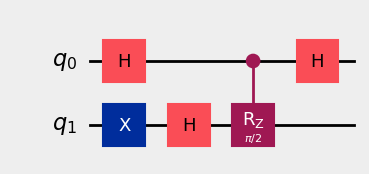

In [66]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.crz(math.pi /2, 0,1)
qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
#matrix = Statevector.from_instruction(qc)
#plot_bloch_multivector(matrix, figsize=[3,3])

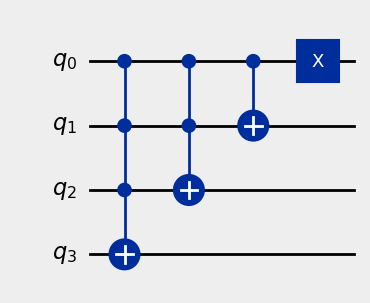

In [67]:
# incremento
qc = QuantumCircuit(4)
qc.mcx([0,1,2],3)
qc.ccx(0,1,2)
qc.cx(0,1)
qc.x(0)

qc.draw(output='mpl' ,style={'backgroundcolor': '#EEEEEE'})

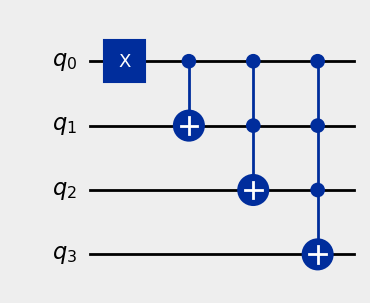

In [68]:
# decremento
qc = QuantumCircuit(4)
qc.x(0)
qc.cx(0,1)
qc.ccx(0,1,2)
qc.mcx([0,1,2],3)
qc.draw(output='mpl' ,style={'backgroundcolor': '#EEEEEE'})

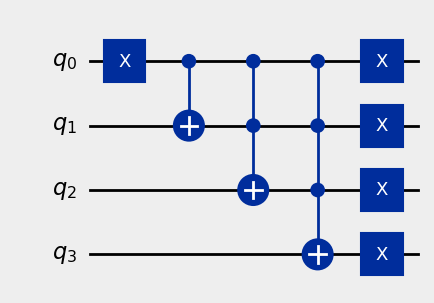

In [69]:
# abs ou módulo de um número
qc = QuantumCircuit(4)
qc.x(0)
qc.cx(0,1)
qc.ccx(0,1,2)
qc.mcx([0,1,2],3)
qc.x([0,1,2,3])
qc.draw(output='mpl' ,style={'backgroundcolor': '#EEEEEE'})

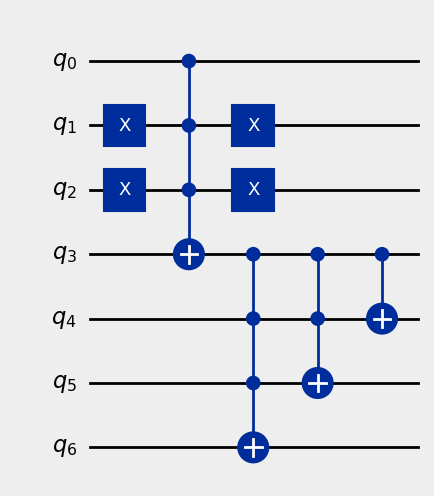

In [70]:
# if(q2q1q0 == 001) then (q5q4q3)++
qc = QuantumCircuit(7)

qc.x([2,1]) # q2qlq0 = 111 somente se o valor na entrada for 001
qc.mcx([0,1, 2], 3) #QUBIT 3 será igual a 1 se 
qc.x([2,1]) # restaurando q2qlq0 ao valor original
# AQUI q3 será igual a 1 se q2q1q0 = 001
qc.mcx( [3,4,5],6)
qc.ccx(3,4,5)
qc.cx(3,4)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [71]:
A = 1
B = 12
A = A ^ B
B = B ^ A
A = A ^ B
print(A,B)

12 1


In [72]:
import struct

def xor_float(f1, f2):
    i1 = struct.unpack('>Q', struct.pack('>d', f1))[0]
    i2 = struct.unpack('>Q', struct.pack('>d', f2))[0]

    xor_result_int = i1 ^ i2

    xor_result_float = struct.unpack('>d', struct.pack('>Q', xor_result_int))[0]
    return xor_result_float

A = 10.25
B = 5.5
A = xor_float(A, B)
B = xor_float(B, A)
A = xor_float(A, B)
print(A,B)


5.5 10.25


In [73]:
def xor_bytes_strings(s1: str, s2: str) -> str:
    b1 = s1.encode('utf-8')
    b2 = s2.encode('utf-8')

    min_len = min(len(b1), len(b2))
    result_bytes = bytes([b1[i] ^ b2[i] for i in range(min_len)])
        
    return result_bytes.decode('utf-8', errors='ignore') 

A = "ABC"
B = "DFG"
A = xor_bytes_strings(A, B)
B = xor_bytes_strings(B, A)
A = xor_bytes_strings(A, B)
print(A,B)

DFG ABC


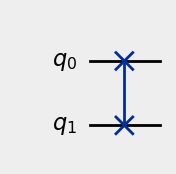

In [74]:
qc = QuantumCircuit(2)
qc.swap(0,1)
qc.decompose().draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

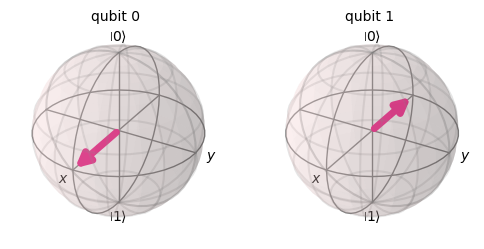

In [75]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h([0,1])
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

In [76]:
y = 23
x = 22
y = x^(x>>1)
y = y^(y>>2)
y = y^(y>>4)
y = y^(y>>8)
y = y^(y>>16)
y = y^(y>>32)
y = y^(y>>64)
y = y^(y>>128)

{'000': 134, '111': 122}


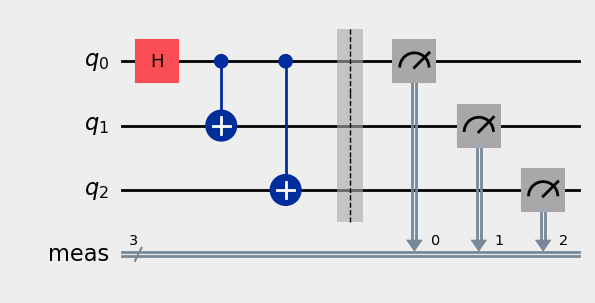

In [77]:
#fauno escolhendo caminho no labirinto
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend.run(qc, shots=256).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl' ,style={'backgroundcolor': '#EEEEEE'})

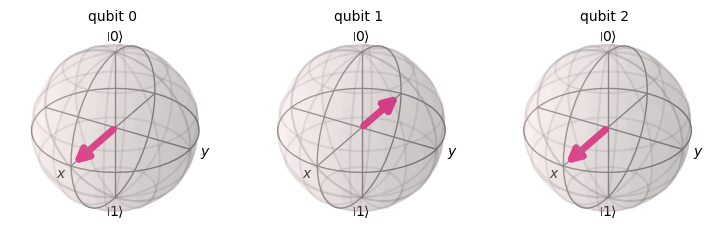

In [78]:
qc = QuantumCircuit(3)
qc.h([0,2])
qc.x(1)
qc.h(1)
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

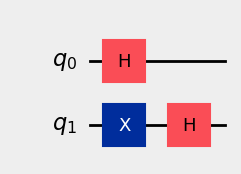

In [79]:
qc = QuantumCircuit(2)
#QFT
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE' })

{'00': 59, '10': 60, '11': 65, '01': 72}


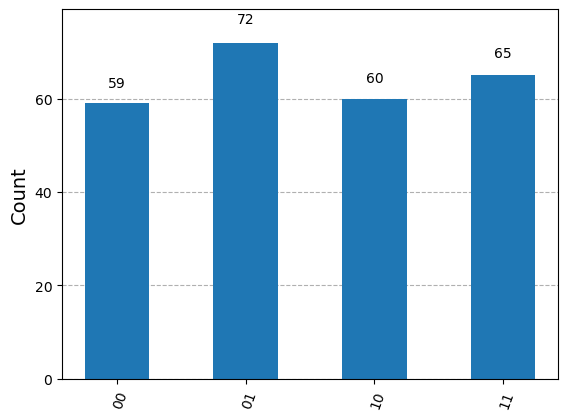

In [80]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend. run(qc, shots=256).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

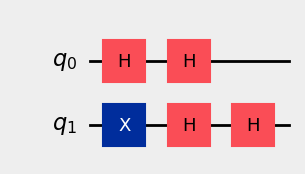

In [81]:
qc = QuantumCircuit (2)
# QFT
qc.h(0)
qc.x(1)
qc.h(1)
qc.h([0,1])
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'10': 256}


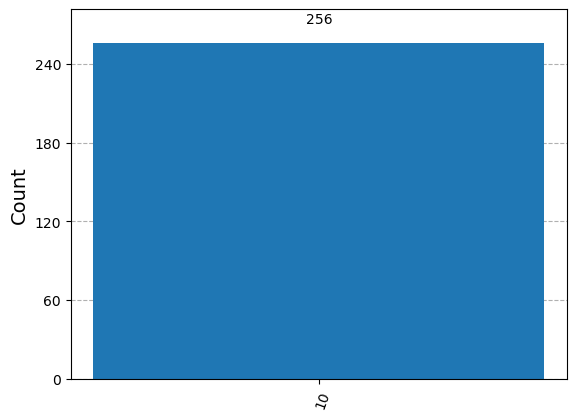

In [82]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend. run(qc, shots=256).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

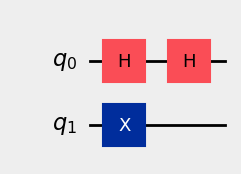

In [83]:
qc = QuantumCircuit(2)
# QFT
qc.h(0)
qc.x(1)
qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor':'#EEEEEE'})

{'10': 256}


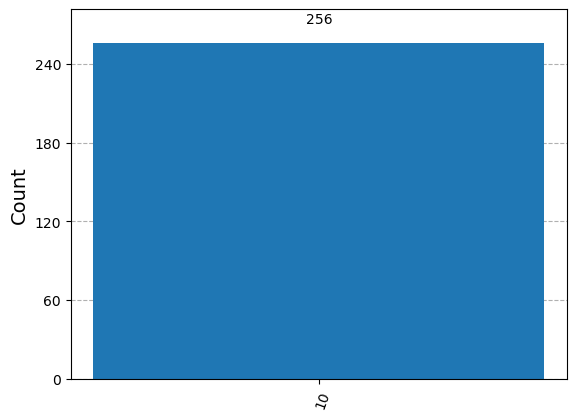

In [84]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend. run(qc, shots=256).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

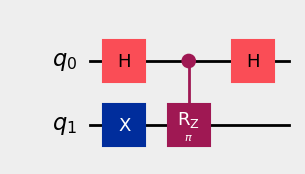

In [85]:
qc = QuantumCircuit(2)
# QFT
qc.h(0)
qc.x(1)
qc.crz(math.pi, 0,1)
qc.h(0)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

{'11': 125, '10': 131}


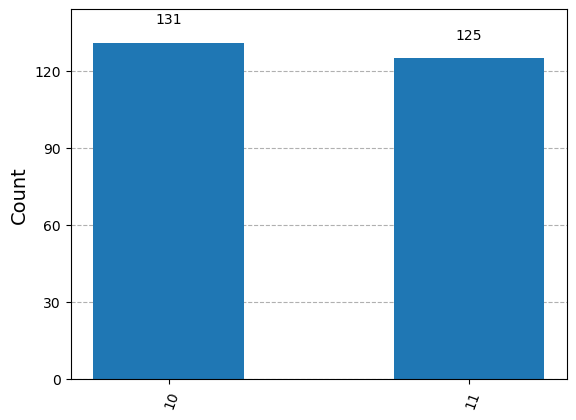

In [86]:
qc.measure_all()
backend = BasicProvider().get_backend('basic_simulator')
result = backend. run(qc, shots=256).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# SWAP e Phases

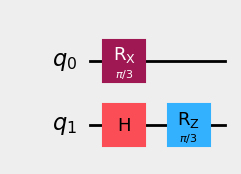

In [87]:
qc = QuantumCircuit(2)
# QFT
qc.rx(math.pi /3, 0)
qc.h(1)
qc.rz(math.pi /3, 1)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

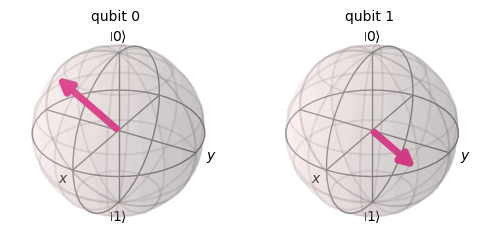

In [88]:
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])

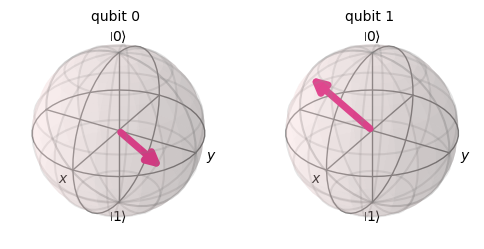

In [89]:
qc.swap(0,1)
matrix = Statevector.from_instruction(qc)
plot_bloch_multivector(matrix, figsize=[3,3])